In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Description 

This is the .csv file. It only has 8 fields. Maybe for explanation:

It is still about a kind of code analysis therefore this .csv file.

As the name says the name of the written class I have here however by default random first names generated.

linesOfCode should be self-explanatory. The written lines of code.

testRequirementFulfilled describes if a unittest is generated for this class. 0 is false and 1 is true. actually I had this in as a bool - but this can be customized by you if you like.

cyclometicComplexity says how nested the logic of the method is. for example.
public bool IsValueValid(int i){} // has complexity of 0
public bool IsValueValid(int i){ if(i>10) Do.Something() } // has complexity of 1

cc_rank: here I make an internal classification of the cyclomaticComplexity. The values go from A to F. A satisfies all rules whereas F is a very badly written code.

methodNameFulfillment: similar to "testRequirementFulfilled" this tells if the method name matches the function or not. I also do this evaluation internally. is also a bool actually. 0 is false and 1 is true.

functionalityDuplication: also similar to methodNameFulfillment. tells if a similar code function exists in the method. i also evaluate this myself. is also a bool. 0 is false and 1 is true.

inheritanceCheck gives me the inheritance depth of the class.
e.g.
Class1{ ... } has an inheritance depth of 1
Class 2 : Class1 { ... } has an inheritance depth of 2

##### metricFulfillment is the prediction class
## linesOfCode:

#### if linesOfCode <= 50: 0.06
#### if linesOfCode > 50 & <= 100: 0.04
#### if linesOfCode > 100 & <= 200: 0.02
#### if linesOfCode > 200: 0.00


## testRequirementFulfilled:
#### If testRequirementFulfilled = 0: 0.00
#### if testRequirementFulfilled = 1: 0.08

## cc_rank:
#### If cc_rank = A: 0.15
#### If cc_rank = B: 0.12
#### If cc_rank = C: 0.09
#### If cc_rank = D: 0.06
#### If cc_rank = E: 0.03
#### If cc_rank = F: 0.00

## methodNameFulfillment:
#### When methodNameFulfillment = 0: 0.00
#### If methodNameFulfillment = 1: 0.33

## functionalityDuplication:
#### When functionalityDuplication = 0: 0.00
#### If functionalityDuplication = 1: 0.28

## inheritanceCheck:
#### If inheritanceCheck >0 & <= 2: 0.10
#### If inheritanceCheck >2 & <= 4: 0.08
#### If inheritanceCheck >4 & <= 6: 0.06
#### If inheritanceCheck >6 & <= 8: 0.04
#### If inheritanceCheck >8 & <= 10: 0.02
#### If inheritanceCheck >10: 0.00

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from numpy import sqrt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/freelanceeing/Robin_Regression/codingBehavior_new.csv',sep=';')

In [ ]:
df

className  linesOfCode  testRequirementFulfilled  cyclometicComplexity  \
0       Lexine          177                         0                    60   
1      Adriana          170                         1                    16   
2     Willetta           59                         0                    54   
3        Wanda          115                         1                    23   
4       Gloria          146                         1                    35   
..         ...          ...                       ...                   ...   
995    Ellette          124                         1                    38   
996     Elvira           25                         0                    30   
997    Kristan           50                         1                    28   
998      Marcy          143                         0                    10   
999  Constance          134                         1                    29   

    cc_rank  methodNameFulfillment  functionalityDuplication  \
0         C                      0                         1   
1         A                      0                         0   
2         D                      0                         0   
3         B                      0                         0   
4         E                      1                         0   
..      ...                    ...                       ...   
995       B                      0                         0   
996       C                      0                         1   
997       C                      0                         1   
998       A                      0                         1   
999       E                      0                         0   

     inheritanceCheck  metricFulfillment  
0                   8               0.98  
1                   8               0.41  
2                   7               0.75  
3                   8               0.08  
4                  10               0.80  
..                ...                ...  
995                 2               0.81  
996                10               0.81  
997                12               0.59  
998                 7               0.67  
999                 6               0.79  

[1000 rows x 9 columns]

In [ ]:
df = df.drop("metricFulfillment", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


### Create new weights for the metricFulfillment

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.dropna()

className  linesOfCode  testRequirementFulfilled  cyclometicComplexity  \
0       Lexine          177                         0                    60   
1      Adriana          170                         1                    16   
2     Willetta           59                         0                    54   
3        Wanda          115                         1                    23   
4       Gloria          146                         1                    35   
..         ...          ...                       ...                   ...   
995    Ellette          124                         1                    38   
996     Elvira           25                         0                    30   
997    Kristan           50                         1                    28   
998      Marcy          143                         0                    10   
999  Constance          134                         1                    29   

    cc_rank  methodNameFulfillment  functionalityDuplication  inheritanceCheck  
0         C                      0                         1                 8  
1         A                      0                         0                 8  
2         D                      0                         0                 7  
3         B                      0                         0                 8  
4         E                      1                         0                10  
..      ...                    ...                       ...               ...  
995       B                      0                         0                 2  
996       C                      0                         1                10  
997       C                      0                         1                12  
998       A                      0                         1                 7  
999       E                      0                         0                 6  

[1000 rows x 8 columns]

In [ ]:
final_score = []
loc_score = []
trf_score = []
ccr_score = []
mnf_score = []
fd_score = []
ic_score = []

#Create scores
for x in df.index:
  if df["linesOfCode"][x] <= 50:
    loc_score.append(0.06)

  elif df["linesOfCode"][x] > 50 and df["linesOfCode"][x] <= 100:
    loc_score.append(0.04)
  
  elif df["linesOfCode"][x] > 100 and df["linesOfCode"][x] <= 200:
    loc_score.append(0.02)
  else:
    loc_score.append(0)


#Create scores
for x in df.index:
  if df["testRequirementFulfilled"][x] == 0:
    trf_score.append(0)
  else:
    trf_score.append(0.08)

for x in df.index:
  if df["cc_rank"][x] == "A":
    ccr_score.append(0.15)
  elif df["cc_rank"][x] == "B":
    ccr_score.append(0.12)
  elif df["cc_rank"][x] == "C":
    ccr_score.append(0.09)
  elif df["cc_rank"][x] == "D":
    ccr_score.append(0.06)
  elif df["cc_rank"][x] == "E":
    ccr_score.append(0.03)
  else:
    ccr_score.append(0)


for x in df.index:
  if df["methodNameFulfillment"][x] == 0:
    mnf_score.append(0)
  else:
    mnf_score.append(0.33)



for x in df.index:
  if df["functionalityDuplication"][x] == 0:
    fd_score.append(0)
  else:
    fd_score.append(0.28)

for x in df.index:
  if df["inheritanceCheck"][x]>0 and df["inheritanceCheck"][x] <= 2:
    ic_score.append(0.10)
  elif df["inheritanceCheck"][x]>2 and df["inheritanceCheck"][x] <= 4:
    ic_score.append(0.08)
  elif df["inheritanceCheck"][x]>4 and df["inheritanceCheck"][x] <= 6:
    ic_score.append(0.06)
  elif df["inheritanceCheck"][x]>6 and df["inheritanceCheck"][x] <= 8:
    ic_score.append(0.04)
  elif df["inheritanceCheck"][x]>8 and df["inheritanceCheck"][x] <= 10:
    ic_score.append(0.02)
  else:
    ic_score.append(0)

In [ ]:
print(len(ccr_score), len(ic_score), len(fd_score), len(mnf_score), len(trf_score))

1000 1000 1000 1000 1000


In [ ]:
# final score for the prediction output
for x in df.index:
  #print(loc_score[x])
  final_score.append(round(loc_score[x] + trf_score[x] + ccr_score[x] + mnf_score[x] + fd_score[x] + ic_score[x], 2))

In [ ]:
len(final_score)

1000

In [ ]:
final_score[0:5]

[0.43, 0.29, 0.14, 0.26, 0.48]

In [1]:
df["metricFulfillment"] = final_score

NameError: ignored

In [ ]:
df.head()

className  linesOfCode  testRequirementFulfilled  cyclometicComplexity  \
0    Lexine          177                         0                    60   
1   Adriana          170                         1                    16   
2  Willetta           59                         0                    54   
3     Wanda          115                         1                    23   
4    Gloria          146                         1                    35   

  cc_rank  methodNameFulfillment  functionalityDuplication  inheritanceCheck  \
0       C                      0                         1                 8   
1       A                      0                         0                 8   
2       D                      0                         0                 7   
3       B                      0                         0                 8   
4       E                      1                         0                10   

   metricFulfillment  
0               0.43  
1               0.29  
2               0.14  
3               0.26  
4               0.48

In [ ]:
#checking unique values of className
print(df['className'].unique(),"\n")

['Lexine' 'Adriana' 'Willetta' 'Wanda' 'Gloria' 'Tera' 'Averyl' 'Roseline'
 'Margalo' 'Selia' 'Gretal' 'Cathie' 'Dianemarie' 'Melisent' 'Ashlee'
 'Shirlee' 'Caressa' 'Ethel' 'Basia' 'Amii' 'Amara' 'Carolina' 'Oona'
 'Dorene' 'Aryn' 'Doralynne' 'Lorenza' 'Dorice' 'Marcy' 'Xylina' 'Kary'
 'Ottilie' 'Celisse' 'Leeanne' 'Janey' 'Lizzie' 'Shannah' 'Myriam'
 'Ebonee' 'Abbie' 'Cam' 'Caryl' 'Gilligan' 'Addia' 'Carmencita' 'Ursulina'
 'Tersina' 'Kate' 'Ellette' 'Flo' 'Fred' 'Heida' 'Tybie' 'Sadie' 'Joeann'
 'Lyssa' 'Margarette' 'Rayna' 'Ericka' 'Gavrielle' 'Vivia' 'Tilly'
 'Lulita' 'Cherrita' 'Edith' 'Glynnis' 'Jany' 'Petronia' 'Beatriz'
 'Nariko' 'Augustine' 'Tami' 'Farrah' 'Jeanna' 'Latisha' 'Orsola' 'Dyann'
 'Miquela' 'Gwenneth' 'Kamilah' 'Johna' 'Dacia' 'Berta' 'Keelia' 'Misha'
 'Jenilee' 'Desirae' 'Valeda' 'Sibella' 'Joelly' 'Caritta' 'Benita'
 'Ricky' 'Liana' 'Halette' 'Siana' 'Concettina' 'Marylou' 'Sarette'
 'Ernesta' 'Rochette' 'Blake' 'Beverley' 'Briney' 'Feliza' 'Ivett'
 'Pollyanna' 

In [ ]:
#since class name is a continuous variable, and does not contribute to our prediction value, we will drop this column
df = df.drop("className", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
df.head()

linesOfCode  testRequirementFulfilled  cyclometicComplexity cc_rank  \
0          177                         0                    60       C   
1          170                         1                    16       A   
2           59                         0                    54       D   
3          115                         1                    23       B   
4          146                         1                    35       E   

   methodNameFulfillment  functionalityDuplication  inheritanceCheck  \
0                      0                         1                 8   
1                      0                         0                 8   
2                      0                         0                 7   
3                      0                         0                 8   
4                      1                         0                10   

   metricFulfillment  
0               0.43  
1               0.29  
2               0.14  
3               0.26  
4               0.48

In [ ]:
#Now let us encode cc_rank grades
cc_rank_encode=LabelEncoder()

In [ ]:
df['cc_rank']=cc_rank_encode.fit_transform(df['cc_rank'])
pickle.dump(cc_rank_encode, open('cc_rank_encode.pkl', 'wb'))

In [ ]:
df.head()

linesOfCode  testRequirementFulfilled  cyclometicComplexity  cc_rank  \
0          177                         0                    60        2   
1          170                         1                    16        0   
2           59                         0                    54        3   
3          115                         1                    23        1   
4          146                         1                    35        4   

   methodNameFulfillment  functionalityDuplication  inheritanceCheck  \
0                      0                         1                 8   
1                      0                         0                 8   
2                      0                         0                 7   
3                      0                         0                 8   
4                      1                         0                10   

   metricFulfillment  
0               0.43  
1               0.29  
2               0.14  
3               0.26  
4               0.48

In [ ]:
df=df.astype('float64') #converting dataframe to numerical datatype

In [ ]:
df.head()

linesOfCode  testRequirementFulfilled  cyclometicComplexity  cc_rank  \
0        177.0                       0.0                  60.0      2.0   
1        170.0                       1.0                  16.0      0.0   
2         59.0                       0.0                  54.0      3.0   
3        115.0                       1.0                  23.0      1.0   
4        146.0                       1.0                  35.0      4.0   

   methodNameFulfillment  functionalityDuplication  inheritanceCheck  \
0                    0.0                       1.0               8.0   
1                    0.0                       0.0               8.0   
2                    0.0                       0.0               7.0   
3                    0.0                       0.0               8.0   
4                    1.0                       0.0              10.0   

   metricFulfillment  
0               0.43  
1               0.29  
2               0.14  
3               0.26  
4               0.48

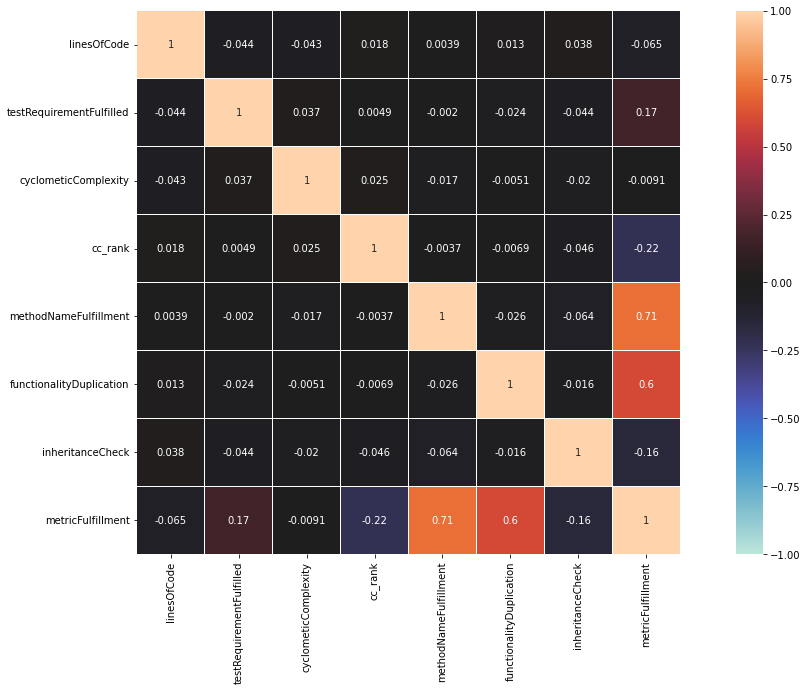

In [ ]:
##plotting correlation 
plt.figure(figsize = (20,10))
ax=sns.heatmap(df.corr(), annot = True,square=True,linewidths=.5,vmin=-1, vmax=1, center= 0)

# Regression Functions 

In [ ]:
df_scaler =StandardScaler()
X=df.loc[:,df.columns!='metricFulfillment'].values
y=df['metricFulfillment'].values
x = df_scaler.fit_transform(X)
pickle.dump(df_scaler, open('scaling_data.pkl', 'wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=1)  ### splitting data for train and test purpose

### Training with keras DNN

In [ ]:
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(32, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(24, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
history=model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print(f'MSE: {error:.3f}, RMSE: {sqrt(error):.3f}')

Epoch 1/200
24/24 [==============================] - 1s 4ms/step - loss: 0.6014
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1912
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1152
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0788
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0571
Epoch 6/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0426
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 8/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 9/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 10/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 11/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 12/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 13/200
24/24 [=================

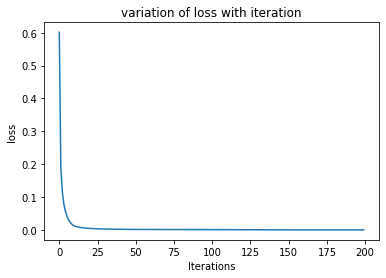

In [ ]:
##plot the loss change over iteration
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.title('variation of loss with iteration')

plt.show()

In [ ]:
##dict to save loss and score for different learning rate
rate={}
data={}

In [ ]:
lr=[0.001,0.003,0.02,0.03,0.1]
for i in range(len(lr)):
  ## training with adaptive leaning 
  regr = MLPRegressor(random_state=2, max_iter=200,alpha=0.1,learning_rate='adaptive',learning_rate_init=lr[i]).fit(X_train, y_train)
  y_pred=regr.predict(X_test)
  regr.score(X_test, y_test)
  rate[i]={'lr':lr[i],'val':regr.loss_curve_}
  data[lr[i]]=[mean_squared_error(y_test, y_pred),explained_variance_score(y_test, y_pred),regr.score(X_test, y_test)]

In [ ]:
iter=range(0,300)

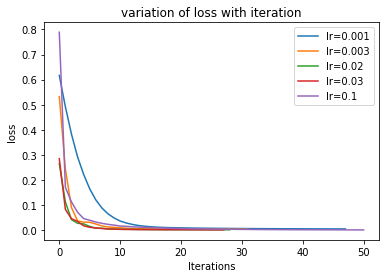

In [ ]:
for key in rate:
  plt.plot(range(len(rate[key]['val'])), rate[key]['val'], label ='lr='+str(rate[key]['lr']) )
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.title('variation of loss with iteration')
plt.legend()
plt.show()

In [ ]:
##dataframe for score and error 
perform=pd.DataFrame.from_dict(data, orient='index',
                       columns=['MSE', 'var', 'R2'])

In [ ]:
perform

MSE       var        R2
0.001  0.003117  0.946437  0.944111
0.003  0.001889  0.967023  0.966129
0.020  0.000775  0.986187  0.986104
0.030  0.000730  0.986993  0.986908
0.100  0.000244  0.995732  0.995634

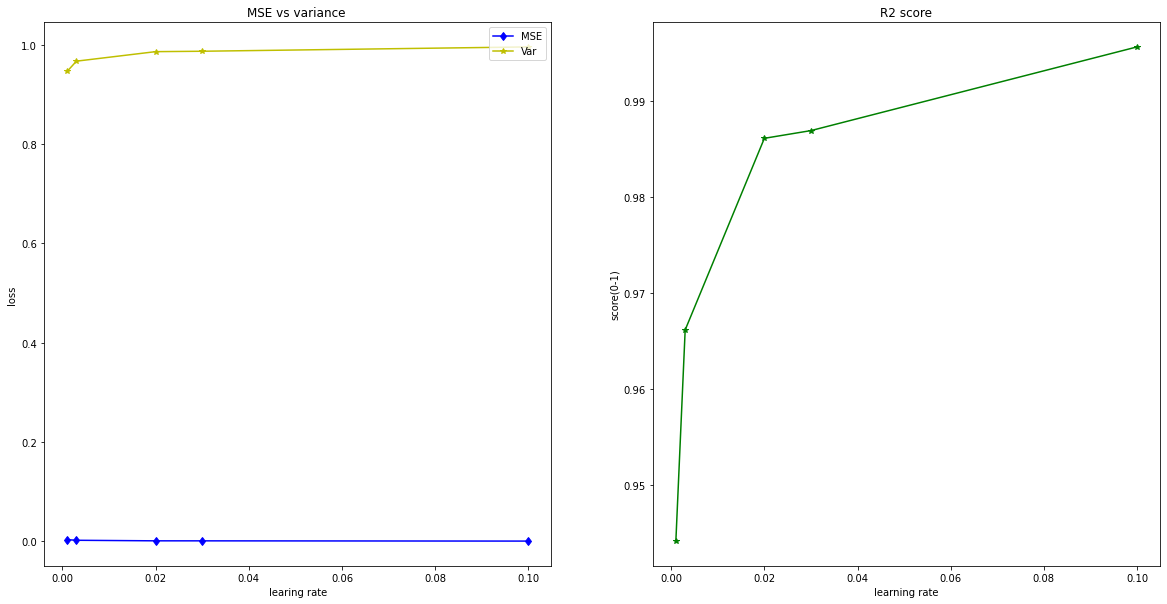

In [ ]:
##plotting score and error
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
ax1.plot(perform.index,perform['MSE'], marker='d', color='b', label='MSE')
ax1.plot(perform.index,perform['var'], marker='*', color='y', label='Var')
ax1.set_title('MSE vs variance ')
ax1.set_xlabel("learing rate")
ax1.legend(loc="upper right")
ax1.set_ylabel("loss")
ax2.plot(perform.index,perform['R2'], marker='*', color='g', label='R2_score')
ax2.set_title('R2 score')
ax2.set_xlabel("learning rate")
ax2.set_ylabel("score(0-1)")
plt.show()

In [ ]:
## traning model  with lr=0.03 for new input data
regr = MLPRegressor(random_state=2, max_iter=200,alpha=0.03,learning_rate='adaptive',learning_rate_init=lr[i]).fit(x, y)

with open('mlp_model.pkl', 'wb') as fid: ##savig model
  pickle.dump(regr, fid)

#Write a function for predicting new input

In [ ]:
#change this link, I added randomly because i had no unseen data. 
input_df=pd.read_csv('/content/drive/MyDrive/freelanceeing/Robin_Regression/codingBehavior_new.csv',sep=';')

In [ ]:
input_df = input_df.drop("className", 1)
#input_df = input_df.drop("metricFulfillment", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
## loading encoder 
feature_scalar=pickle.load(open('scaling_data.pkl', 'rb'))
ccrank_encodee=pickle.load( open('cc_rank_encode.pkl', 'rb'))

In [ ]:
##using encoder and scaler
input_df['cc_rank']=ccrank_encodee.transform(input_df['cc_rank'])
input_df=input_df.astype('float64')

In [ ]:
x = feature_scalar.fit_transform(input_df.loc[:,input_df.columns!='metricFulfillment'].values)
##load MLP model
with open('mlp_model.pkl', 'rb') as fid:
    model = pickle.load(fid)

y_pred=model.predict(x)

In [ ]:
print("Predicted values:",y_pred)

Predicted values: [0.43577122 0.28061165 0.16422569 0.26922812 0.49109584 0.8928701
 0.47415286 0.71531141 0.64382056 0.3470854  0.45177579 0.76901506
 0.82982208 0.7856517  0.6342378  0.65474843 0.76262654 0.50912729
 0.12330305 0.88194915 0.07987998 0.38574971 0.1279348  0.43563554
 0.27228831 0.79446847 0.71097447 0.51052635 0.26407436 0.8329495
 0.45602599 0.61082168 0.45212042 0.56828739 0.63021208 0.87635396
 0.42879151 0.36945255 0.75566721 0.58854578 0.38877054 0.44647357
 0.71365305 0.79750213 0.67268662 0.84844804 0.83074762 0.21985026
 0.84755146 0.94775602 0.69850047 0.68451399 0.19687672 0.79354799
 0.45465901 0.44985457 0.54891977 0.45465047 0.70340761 0.76539061
 0.40267867 0.42642085 0.88270608 0.14313457 0.4916322  0.2761573
 0.4386894  0.75795025 0.57792006 0.39962783 0.49452892 0.37025224
 0.53601504 0.90909365 0.28074409 0.68892196 0.81364127 0.40054368
 0.1264672  0.73836296 0.37730589 0.21186444 0.50749825 0.48298357
 0.88067373 0.49756013 0.56226783 0.18450282 0.